# Simulación de un modelo epidemiológico

Se utilizó un modelo epidemiológico basado en el modelo SIR para comparar dos poblaciones: una no inmunizada y otra con individuos inmunizados. El modelo SIR divide la población en tres grupos: susceptibles, infectados y recuperados.

Los parámetros del modelo, como la tasa de contacto y la tasa de recuperación, determinan cómo se propaga la enfermedad en la población.

- Tasa de contacto (`beta`): es la probabilidad de que un individuo susceptible entre en contacto con un individuo infectado y se infecte.

- Tasas de recuperación (`gamma`): es la probabilidad de que un individuo infectado se recupere.

![Diagrama de los flujos](https://i.imgur.com/zLHuYBt.png)

# Instalación e imporatacion de paquetes
Se utiliza el comando `%pip` para instalar los siguientes paquetes: `pint`, `modsimpy`, `numpy`, `pandas`, `scipy` y `matplotlib`.

In [1]:
%pip install pint modsimpy numpy pandas scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from modsim import TimeFrame, State, System, decorate
import modsim as ms

# Definición de funciones

Se define la función `make_system`, que toma los parámetros `beta` y `gamma` y devuelve una instancia de la clase `System` con la configuración inicial del sistema. La función crea un objeto `State` para representar el estado inicial del sistema, donde `s` representa la fracción de la población susceptible, `i` la fracción de la población infectada y `r` la fracción de la población recuperada.

La función también establece el tiempo final (`t_end`) en 7*14 (dos semanas).

In [3]:
def make_system(beta, gamma):
    init = State(s=99, i=1, r=0)
    init /= init.sum()

    return System(init=init, t_end=7*14,
                  beta=beta, gamma=gamma)

Las ecuaciones de Kermack-McKendrick, son un conjunto de ecuaciones diferenciales que describen el cambio en la población de los tres grupos. Estas ecuaciones representan cómo evoluciona la enfermedad en el tiempo y cómo se propagan los individuos entre los diferentes estados de infección.

Las ecuaciones son las siguientes:
![Ecuaciones KM](https://imgur.com/MYrb2lx.png)

La función `update_func` representa la dinámica del sistema en cada paso de tiempo. La función toma el tiempo actual (`t`), el estado actual (`state`) y el sistema (`system`) como parámetros. Calcula `infected` y `recovered`, que son las tasas de infección y recuperación, respectivamente. Luego actualiza `s`, `i` y `r` en el objeto `State` y devuelve el nuevo estado.

In [4]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r

    infected = system.beta * s * i
    recovered = system.gamma * i

    s -= infected
    i += infected - recovered
    r += recovered

    return State(s=s, i=i, r=r)

La función `run_simulation`, que ejecuta la simulación del modelo. La función crea un `TimeFrame` vacío para almacenar los resultados de la simulación. Luego, itera y en cada paso de tiempo, llama a la función `update_func` para actualizar el estado del sistema y agrega el nuevo estado al `TimeFrame`. Al final, devuelve el `TimeFrame`.

In [5]:
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init

    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)

    return frame

La función `plot_results` se encarga de graficar los resultados del modelo epidemiológico.

In [6]:
def plot_results(s, i, r):
    ms.plot(s, '--', label="Susceptibles")
    ms.plot(i,'-', label='Infectados')
    ms.plot(r,':', label='Recuperados')
    ms.decorate(xlabel='Tiempo (días)', ylabel='Fracción de la población')

La función `add_immunization`, es la que agrega la inmunización al sistema. La función toma el sistema y la fracción de la población que se inmuniza (`fraction`). Reduce la población susceptible en la fracción inmunizada y aumenta la población recuperada en la misma cantidad. Actualiza `s` y `r` en el objeto `State`.

In [7]:
def add_immunization(system, fraction):
    system.init.s -= fraction
    system.init.r += fraction

# Configuración de los parámetros iniciales y ejecución de la simulación

Se configuran los parámetros iniciales del modelo, se ejecuta la simulación con la función `run_simulation` y se almacenan los resultados en el objeto `results`.

In [8]:
tc = 2             # Tiempo entre los contactos (en días)
tr = 4             # Tiempo de recuperación (en días)

beta = 1 / tc      # tasa de contacto por día
gamma = 1 / tr     # tasa de recuperación por día

In [9]:
system = make_system(beta, gamma)
results = run_simulation(system, update_func)

In [10]:
system2 = make_system(beta, gamma)
add_immunization(system2, 0.3)
results2 = run_simulation(system2, update_func)

# Resultados

Se realizan gráficos para visualizar los resultados del modelo epidemiológico en dos escenarios diferentes: una población no inmunizada y una población inmunizada.

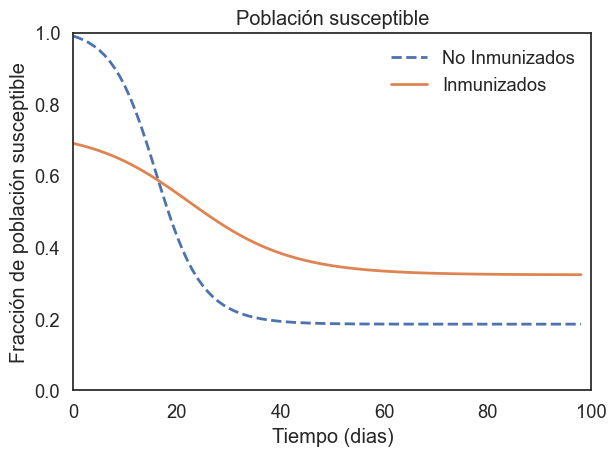

In [11]:
results.s.plot(linestyle='--', label='No Inmunizados')
results2.s.plot(label='Inmunizados')

decorate(title='Población susceptible',
         xlabel='Tiempo (dias)',
         ylabel='Fracción de población susceptible',
         ylim=(0, 1.0),
         xlim=(0, 100))

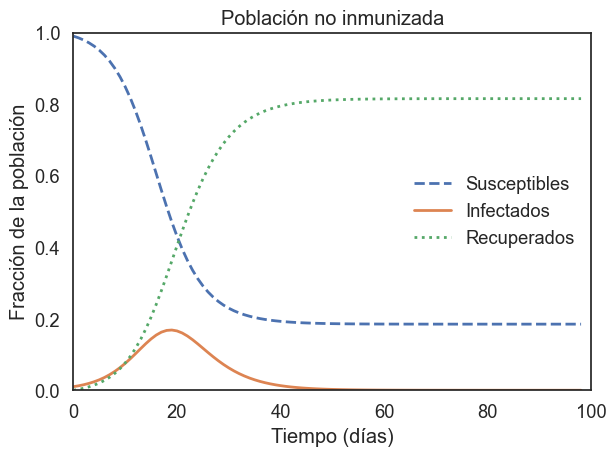

In [12]:
plot_results(results.s, results.i, results.r)
decorate(title='Población no inmunizada',
         ylim=(0, 1.0),
         xlim=(0, 100))

In [13]:
results.tail() * 100

,s,i,r
94,18.478914,0.000126,81.520960
95,18.478903,0.000106,81.520991
96,18.478893,0.000089,81.521018
97,18.478885,0.000075,81.521040
98,18.478878,0.000063,81.521059


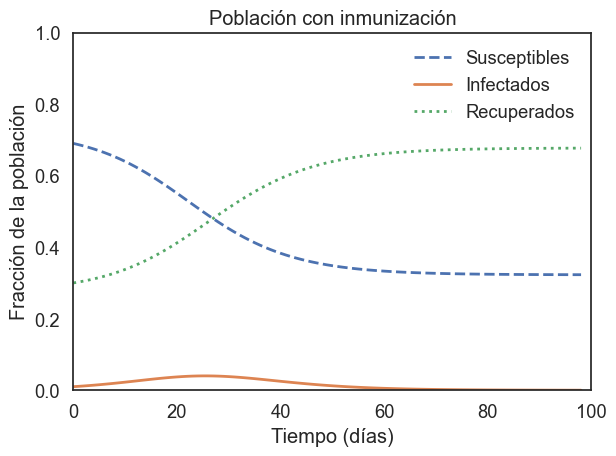

In [14]:
plot_results(results2.s, results2.i, results2.r)
decorate(title='Población con inmunización',
         ylim=(0, 1.0),
         xlim=(0, 100))

In [15]:
results2.tail() * 100

,s,i,r
94,32.315259,0.024528,67.660213
95,32.311295,0.022359,67.666345
96,32.307683,0.020382,67.671935
97,32.304391,0.018579,67.677030
98,32.301390,0.016935,67.681675


# Conclusiones
Se puede observar que en el escenario de una población no inmunizada, la enfermedad se propaga rápidamente y la mayoría de la población se infecta en un corto período de tiempo. En cambio, en el escenario de una población inmunizada, la enfermedad se propaga más lentamente y la mayoría de la población no se infecta. Esto se debe a que la inmunización reduce la población susceptible y aumenta la población recuperada.